## MACHINE LEARNING INTERNSHIP
8BitWorriors
## WEEK 4 TASK
## Credit Card Fraud Detection System
## Created by - Shivansh Hingve

I am using the dataset of [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud) by ULB machine learning group.
### Contents

1. Dataset Preparation  
2. Visualize Fraud Vs Non Fraud Transactions  
3. AutoEncoders : Latent Representation Extraction  
4. Obtain the Latent Representations  
5. Visualize Latent Representations : Fraud vs Non Fraud  
6. Simple Linear Classifier  
7. Applying the same technique on Titanic Dataset

## 1. Dataset Preparation

First, we will load all the required libraries and load the dataset using pandas dataframe.

In [13]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [14]:
# load the data from csv file placed locally in our pc
df = pd.read_csv('creditcard.csv')

In [15]:
pd.set_option('display.max_columns', None)

In [16]:
# print the first 5 rows of the dataframe
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [17]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

In [18]:
# data shpae
df.shape

(11959, 31)

In [19]:
# Lets see the column name
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

---

In [20]:
# Summary Statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000
mean,8009.996822,-0.216230,0.277097,0.889505,0.282606,-0.086585,0.139986,-0.121943,-0.048727,0.911579,-0.285865,0.820266,-1.442642,0.934682,0.782071,-0.179180,-0.024968,0.379550,-0.022419,-0.065877,0.022534,-0.061474,-0.153850,-0.033709,0.017113,0.104794,0.062891,0.008320,0.000271,62.352617,0.004349
std,6204.332248,1.583914,1.308884,1.331824,1.478162,1.191776,1.306285,1.153899,1.246823,1.192349,1.173549,1.183516,1.542860,1.185540,1.297608,0.985644,0.926829,1.106732,0.827064,0.825127,0.575860,0.918705,0.626631,0.505355,0.591394,0.429413,0.561603,0.405100,0.261230,178.247010,0.065803
min,0.000000,-27.670569,-34.607649,-22.804686,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,-14.166795,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-8.061208,-4.932733,-13.276034,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2542.000000,-0.978944,-0.261503,0.417186,-0.622456,-0.688114,-0.622521,-0.591335,-0.185243,0.196741,-0.734696,0.013157,-2.434287,0.096362,0.181975,-0.773601,-0.510494,-0.104358,-0.463891,-0.554455,-0.155358,-0.268151,-0.543613,-0.171833,-0.333251,-0.144092,-0.353864,-0.080064,-0.015461,5.000000,0.000000
50%,6662.000000,-0.340742,0.256346,0.951223,0.213029,-0.183847,-0.146903,-0.094876,0.013616,0.894911,-0.361219,0.771773,-1.778586,1.015535,1.047427,-0.042979,0.051214,0.372768,0.031698,-0.064862,-0.031566,-0.130062,-0.124900,-0.044299,0.072099,0.143136,0.001972,-0.003039,0.015452,15.950000,0.000000
75%,12382.000000,1.161273,0.883626,1.613678,1.159141,0.346298,0.508432,0.431657,0.267560,1.589120,0.147961,1.631154,-0.131637,1.821011,1.530422,0.505024,0.542400,0.863136,0.477780,0.462036,0.147281,0.021687,0.234029,0.075686,0.401798,0.380076,0.409231,0.106344,0.073171,50.000000,0.000000
max,20642.000000,1.960497,9.092123,4.101716,11.927512,34.099309,21.393069,34.303177,5.499963,10.392889,12.259949,12.018913,3.774837,4.465413,5.748734,3.635042,4.816252,9.253526,4.295648,4.555359,8.012574,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


---

In [21]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l2')

In [22]:
# distribution of legitimate transactions & fraudulent transactions
df['Class'].value_counts()

0.0    11906
1.0       52
Name: Class, dtype: int64

In [23]:
# separating the data for analysis
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [24]:
# statistical measures of the legit data
legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.0
mean,7993.389048,-0.200839,0.259753,0.929229,0.255987,-0.076685,0.149326,-0.097364,-0.053087,0.927305,-0.256049,0.794760,-1.403693,0.936354,0.827956,-0.178954,-0.003069,0.412508,-0.012325,-0.067319,0.020836,-0.063076,-0.154427,-0.032369,0.018962,0.105861,0.061825,0.005330,0.000012,62.198127,0.0
std,6204.041605,1.535589,1.273794,1.114151,1.410471,1.164197,1.298488,1.023768,1.241684,1.157766,1.045628,1.099140,1.398833,1.187073,1.045442,0.986152,0.826826,0.889690,0.792347,0.820651,0.573676,0.916374,0.626623,0.471617,0.590864,0.421868,0.562086,0.394317,0.257535,177.379105,0.0
min,0.000000,-27.670569,-34.607649,-15.292743,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-3.390192,-11.208723,-2.595325,-15.144988,-3.389510,-13.780377,-4.152532,-10.115560,-17.098444,-5.366660,-4.932733,-13.276034,-11.468435,-8.593642,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.575312,0.000000,0.0
25%,2524.500000,-0.971713,-0.264567,0.424085,-0.626371,-0.683186,-0.615850,-0.587024,-0.185377,0.206804,-0.727532,0.010437,-2.425004,0.096149,0.190387,-0.773680,-0.502200,-0.098526,-0.459173,-0.553986,-0.155527,-0.268151,-0.543687,-0.171570,-0.332274,-0.142225,-0.354429,-0.080188,-0.015454,5.292500,0.0
50%,6603.000000,-0.338881,0.252246,0.955603,0.209310,-0.182190,-0.143611,-0.091637,0.012865,0.902895,-0.359416,0.768050,-1.772686,1.018832,1.052416,-0.042597,0.055946,0.376323,0.033184,-0.065433,-0.031919,-0.130461,-0.125355,-0.044379,0.073391,0.143653,0.000133,-0.003351,0.015351,15.950000,0.0
75%,12353.750000,1.161735,0.874668,1.617780,1.145068,0.346454,0.512990,0.434566,0.264315,1.592209,0.149246,1.616445,-0.125318,1.825514,1.532752,0.505669,0.543132,0.864569,0.478330,0.459559,0.145543,0.020454,0.233438,0.074803,0.402111,0.379967,0.404586,0.104399,0.072180,50.000000,0.0
max,20638.000000,1.960497,9.092123,4.101716,10.463020,34.099309,21.393069,34.303177,5.301896,10.392889,12.259949,10.002190,3.774837,4.465413,5.748734,3.635042,4.816252,9.253526,4.295648,4.555359,8.012574,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,0.0


In [25]:
legit.Amount.describe()

count    11906.000000
mean        62.198127
std        177.379105
min          0.000000
25%          5.292500
50%         15.950000
75%         50.000000
max       7712.430000
Name: Amount, dtype: float64

In [26]:
# statistical measures of the fraud data
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0
mean,11569.615385,-3.769104,4.258027,-8.202329,6.396396,-2.342431,-1.990562,-5.740207,0.950650,-2.729769,-7.089604,6.677641,-10.357643,0.519618,-9.729181,-0.244081,-5.034546,-7.163796,-2.346145,0.250318,0.411236,0.305259,-0.021762,-0.340563,-0.406311,-0.139505,0.306967,0.692927,0.059751,97.724808,1.0
std,4973.192986,4.982637,2.588764,6.440211,3.101234,3.380180,1.364724,5.933358,1.891521,2.604615,4.501488,3.356351,4.470371,0.616882,5.150131,0.873173,4.016046,6.644453,2.880445,1.521390,0.877153,1.312058,0.620514,2.803230,0.565141,1.275266,0.365889,1.303607,0.716576,321.188775,0.0
min,406.000000,-15.819179,-3.157307,-22.804686,1.731595,-11.214422,-4.445610,-21.922811,-3.277535,-7.175097,-14.166795,-0.414575,-17.769143,-0.797484,-19.214325,-2.086989,-12.227189,-18.587366,-8.061208,-2.721853,-3.042626,-2.475962,-1.504119,-19.254328,-1.632653,-4.781606,-0.657488,-3.908080,-1.869290,0.000000,1.0
25%,8040.250000,-4.700229,2.615991,-12.538277,3.953228,-4.033355,-2.906623,-9.619382,-0.025104,-5.392026,-11.730843,4.633095,-14.437070,0.136508,-13.914028,-0.756567,-8.417117,-12.652983,-4.991989,-0.977452,-0.050660,0.038880,-0.512871,-0.516354,-0.859042,-0.676067,0.167692,0.263307,-0.145714,1.000000,1.0
50%,11086.000000,-2.424039,3.884474,-5.923084,6.086203,-1.888410,-2.301329,-3.923341,0.548475,-2.604696,-6.193886,6.397066,-9.891592,0.544879,-9.422899,-0.342795,-3.753137,-5.557071,-1.303450,0.390883,0.461871,0.527062,-0.022426,0.061790,-0.317246,-0.123850,0.389987,0.619595,0.180222,1.000000,1.0
75%,16159.500000,0.098734,6.105963,-4.427344,8.715208,0.145295,-1.503629,-1.569550,1.702146,-0.712418,-4.138628,9.970812,-7.327723,0.876653,-6.603689,0.374921,-2.034866,-2.506660,0.094005,1.328901,0.998043,0.746499,0.275882,0.624407,0.070884,0.998437,0.576408,1.611270,0.575349,1.772500,1.0
max,20451.000000,1.234235,9.067613,2.041003,11.927512,3.624201,3.628382,5.431271,5.499963,2.820829,1.077418,12.018913,-0.503141,1.733917,1.500794,2.000635,2.581851,6.739384,3.042493,3.166999,2.102339,2.086083,1.745315,1.376816,0.645545,1.701796,0.816762,3.052358,1.108933,1809.680000,1.0


In [27]:
fraud.Amount.describe()

count      52.000000
mean       97.724808
std       321.188775
min         0.000000
25%         1.000000
50%         1.000000
75%         1.772500
max      1809.680000
Name: Amount, dtype: float64

In [28]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,7993.389048,-0.200839,0.259753,0.929229,0.255987,-0.076685,0.149326,-0.097364,-0.053087,0.927305,-0.256049,0.794760,-1.403693,0.936354,0.827956,-0.178954,-0.003069,0.412508,-0.012325,-0.067319,0.020836,-0.063076,-0.154427,-0.032369,0.018962,0.105861,0.061825,0.005330,0.000012,62.198127
1.0,11569.615385,-3.769104,4.258027,-8.202329,6.396396,-2.342431,-1.990562,-5.740207,0.950650,-2.729769,-7.089604,6.677641,-10.357643,0.519618,-9.729181,-0.244081,-5.034546,-7.163796,-2.346145,0.250318,0.411236,0.305259,-0.021762,-0.340563,-0.406311,-0.139505,0.306967,0.692927,0.059751,97.724808


In [29]:
# Under-Sampling (building sample dataset containing similar distribution of normal transactions and Fraudulent Transactions)
legit_sample = legit.sample(n=492)
# Concatenating two DataFrames
new_df = pd.concat([legit_sample, fraud], axis=0)
# Print first 5 rows of the new dataset
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3620,3096,-0.302521,0.447474,-0.495757,-3.214799,2.705041,2.762440,0.593847,0.556451,0.697720,-1.090181,-0.111088,0.062652,-0.238457,0.215738,1.069356,-0.255231,-1.072085,0.485110,0.271315,0.156089,0.007343,0.250886,-0.331600,1.009952,0.233730,-0.824471,0.241305,-0.020359,1.00,0.0
7328,9839,0.409579,0.352513,0.594179,0.006498,-0.499915,-0.257798,-0.026429,-0.196667,1.936979,0.443660,2.746664,-2.009949,1.004065,1.443695,0.187718,-0.053268,0.488367,0.034909,0.125858,-0.049484,-0.150878,0.030196,0.484557,0.175439,-1.417267,0.696923,-0.427704,-0.305716,32.60,0.0
994,751,1.284612,0.303073,-0.067909,0.930684,0.117387,-0.487005,0.204739,-0.174873,0.058270,0.015465,-1.165292,-0.155797,0.018859,0.366394,0.996123,0.300771,-0.723471,0.139501,-0.056729,-0.105211,-0.023272,-0.043358,-0.209701,-0.446091,0.791745,-0.276971,0.009979,0.013268,14.05,0.0
5148,4861,-0.859794,0.859531,2.660166,1.935881,0.118830,0.810460,0.173724,0.142050,0.945062,0.201429,1.687748,-2.746359,-0.115526,1.250263,-1.855556,0.227333,0.335876,0.401904,-1.344889,-0.271273,0.078257,0.608928,-0.169812,0.135769,-0.339481,-0.063410,-0.331344,-0.074748,14.40,0.0
426,309,1.031381,-0.089444,0.421362,0.620875,0.330242,1.351988,-0.287901,0.412094,0.313047,-0.414256,0.440656,1.313519,0.767262,-0.122085,0.783838,-1.587346,1.184231,-2.762266,-1.338869,-0.184406,-0.098008,0.077084,0.122698,-0.898894,0.166943,0.393916,0.053320,0.001398,14.60,0.0


In [30]:
# Getting the distribution of the classes for the subsample dataset
new_df['Class'].value_counts()

0.0    492
1.0     52
Name: Class, dtype: int64

---

In [31]:
# Check Missing Values
df.isnull().sum().sort_values(ascending = False)

Class     1
Amount    1
V28       1
V27       1
V26       1
V25       1
V24       1
V23       1
V22       1
V21       1
V20       1
V16       0
V19       0
V18       0
V17       0
Time      0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
V15       0
dtype: int64

In [32]:
new_df.shape

(544, 31)

In [33]:
# Splitting the data into Features & Targets
X = new_df.drop(columns='Class', axis=1)
y = new_df['Class']

In [34]:
# Splitting the data into Training data & Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Check whether the data is splitted in 80:20 ratio
print(X.shape, X_train.shape, X_test.shape)

(544, 30) (435, 30) (109, 30)


In [36]:
# Call the Model
model = RandomForestClassifier(random_state=42)

In [37]:
# import pipeline
from sklearn.pipeline import Pipeline


# Create a pipeline for each model
pipeline = Pipeline([
    ('model', model)
    ])

# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Calculate mean accuracy
mean_accuracy = scores.mean()

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Model:", RandomForestClassifier())
print("Cross-validation Accuracy:", mean_accuracy)
print("Test Accuracy:", accuracy)
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))

model = pipeline

# save the best model
import pickle
pickle.dump(model, open('iris_model.dot', 'wb'))

Model: RandomForestClassifier()
Cross-validation Accuracy: 0.993103448275862
Test Accuracy: 0.9724770642201835
Recall Score:  0.8
Precision Score:  1.0
F1 Score:  0.888888888888889


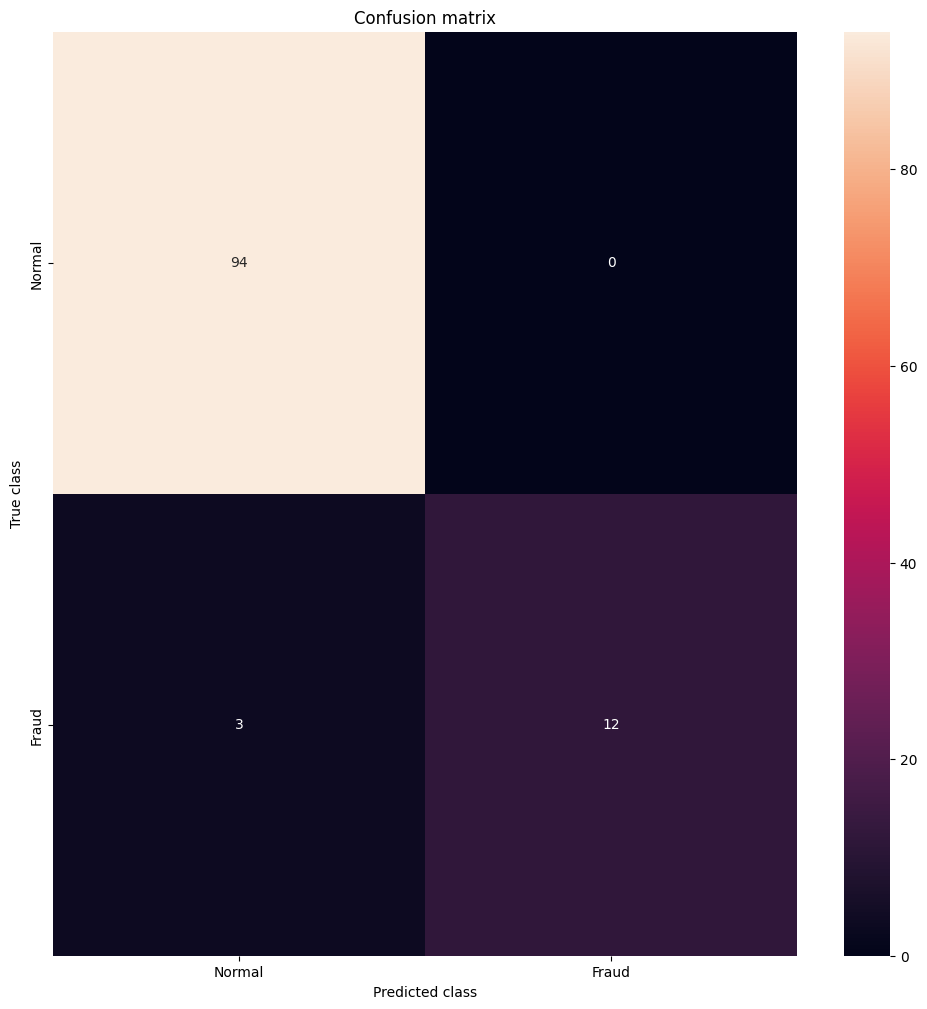

In [38]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [39]:
df_train = new_df.copy()
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3620,3096,-0.302521,0.447474,-0.495757,-3.214799,2.705041,2.762440,0.593847,0.556451,0.697720,-1.090181,-0.111088,0.062652,-0.238457,0.215738,1.069356,-0.255231,-1.072085,0.485110,0.271315,0.156089,0.007343,0.250886,-0.331600,1.009952,0.233730,-0.824471,0.241305,-0.020359,1.00,0.0
7328,9839,0.409579,0.352513,0.594179,0.006498,-0.499915,-0.257798,-0.026429,-0.196667,1.936979,0.443660,2.746664,-2.009949,1.004065,1.443695,0.187718,-0.053268,0.488367,0.034909,0.125858,-0.049484,-0.150878,0.030196,0.484557,0.175439,-1.417267,0.696923,-0.427704,-0.305716,32.60,0.0
994,751,1.284612,0.303073,-0.067909,0.930684,0.117387,-0.487005,0.204739,-0.174873,0.058270,0.015465,-1.165292,-0.155797,0.018859,0.366394,0.996123,0.300771,-0.723471,0.139501,-0.056729,-0.105211,-0.023272,-0.043358,-0.209701,-0.446091,0.791745,-0.276971,0.009979,0.013268,14.05,0.0
5148,4861,-0.859794,0.859531,2.660166,1.935881,0.118830,0.810460,0.173724,0.142050,0.945062,0.201429,1.687748,-2.746359,-0.115526,1.250263,-1.855556,0.227333,0.335876,0.401904,-1.344889,-0.271273,0.078257,0.608928,-0.169812,0.135769,-0.339481,-0.063410,-0.331344,-0.074748,14.40,0.0
426,309,1.031381,-0.089444,0.421362,0.620875,0.330242,1.351988,-0.287901,0.412094,0.313047,-0.414256,0.440656,1.313519,0.767262,-0.122085,0.783838,-1.587346,1.184231,-2.762266,-1.338869,-0.184406,-0.098008,0.077084,0.122698,-0.898894,0.166943,0.393916,0.053320,0.001398,14.60,0.0


In [40]:
#The function display_feature_importance takes a machine learning model (model) as input and performs feature importance analysis.
def display_feature_importance(model,percentage ,top_n=34, plot=False):
    # X and y
    X = df_train.drop('Class',axis=1)
    y = df_train['Class']

    #The model is fitted using the features (X) and the target variable (y), and then the feature importances are calculated.
    model.fit(X, y)

    # Get feature importance
    feature_importance = model.feature_importances_
    feature_names = X.columns

    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

    # Sort features by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # A threshold is calculated based on a specified percentage of the top feature importance.
    #  Features with importance above this threshold are selected.
    threshold = percentage / 100 * feature_importance_df.iloc[0]['Importance']

    # Select features that meet the threshold
    selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

    #Print Selected Feature
    print("Selected Features by {} \n \n at threshold {}%; {}".format(model , percentage,selected_features))

    if plot==True:
        # Set seaborn color palette to "viridis"
        sns.set(style="whitegrid", palette="viridis")

        # Display or plot the top features
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
        plt.title('Feature Importance for {}'.format(type(model).__name__))
        plt.show()

    # Add 'Exited' to the list of selected features
    selected_features.append('Class')

    return selected_features

In [41]:
# List to store selected features for each model and trial percentage
selected_features_xgb = []

# Initilize AUC List
auc_scores = []

# List of trial percentages
trial_percentages = [3, 5, 10, 20, 40]

# Loop over each trial percentage
for percentage in trial_percentages:
        # Get selected features for each model
        xgb_selected_features = display_feature_importance(XGBClassifier(random_state=42), percentage=percentage)

        # Append selected features to the respective lists
        selected_features_xgb.append(xgb_selected_features)

        # X and y
        X = df_train.drop('Class',axis=1)
        y = df_train['Class']

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Fit models on training data
        xgb_model = XGBClassifier()
        xgb_model.fit(X_train[[feature for feature in xgb_selected_features if feature != 'Class']], y_train, verbose=0)

        # Predict probabilities on the test set
        xgb_pred_proba = xgb_model.predict_proba(X_test[[feature for feature in xgb_selected_features if feature != 'Class']])[:, 1]

        # Calculate AUC scores and append to the list
        from sklearn.metrics import roc_auc_score

        auc_xgb = roc_auc_score(y_test, xgb_pred_proba)
        auc_scores.append((auc_xgb,percentage))

        # Sorted AUC
        sorted_auc = sorted(auc_scores, reverse=True)

# Print Each AUC with Percentage
for score , percentage in sorted_auc :
        print(f'The AUC for {type(xgb_model).__name__ , } \n with {percentage}% of top features is {score:.4f}')

Selected Features by XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
 
 at threshold 3%; ['V12', 'V14', 'V4', 'V10', 'V6', 'Time']
Selected Features by XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              col

In [42]:
# Impottant Feature Extract Using XGb
imp_fea = ['V14', 'V10', 'V4', 'V7', 'V21', 'V8', 'V20', 'V3', 'V5', 'V11', 'V12', 'V26', 'V17','Class']
df_train = df_train[imp_fea]
df_train.head()

,V14,V10,V4,V7,V21,V8,V20,V3,V5,V11,V12,V26,V17,Class
3620,0.215738,-1.090181,-3.214799,0.593847,0.007343,0.556451,0.156089,-0.495757,2.705041,-0.111088,0.062652,-0.824471,-1.072085,0.0
7328,1.443695,0.443660,0.006498,-0.026429,-0.150878,-0.196667,-0.049484,0.594179,-0.499915,2.746664,-2.009949,0.696923,0.488367,0.0
994,0.366394,0.015465,0.930684,0.204739,-0.023272,-0.174873,-0.105211,-0.067909,0.117387,-1.165292,-0.155797,-0.276971,-0.723471,0.0
5148,1.250263,0.201429,1.935881,0.173724,0.078257,0.142050,-0.271273,2.660166,0.118830,1.687748,-2.746359,-0.063410,0.335876,0.0
426,-0.122085,-0.414256,0.620875,-0.287901,-0.098008,0.412094,-0.184406,0.421362,0.330242,0.440656,1.313519,0.393916,1.184231,0.0


In [43]:
df_train.shape

(544, 14)

In [44]:
def train_random_forest(data, target):
    # Dictionary to store LabelEncoders for each categorical column
    label_encoders = {}

    # split the data into X and y
    X = data.drop(target, axis=1)
    y = data[target]

    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # # Scaling Data
    # scaler = MinMaxScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    # Define the Random Forest model
    rf_model = RandomForestClassifier(random_state=0,class_weight='balanced')

    # Define hyperparameters for tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_rf_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparameters
    print('Best Hyperparameters:')
    print(best_params)

    # Train the model on the full training set
    best_rf_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred_rf = best_rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_rf)
    precision = precision_score(y_test, y_pred_rf)
    recall = recall_score(y_test, y_pred_rf)

    print(f'Accuracy on Test Set: {accuracy:.2f}')
    print(f'Precision on Test Set: {precision:.2f}')
    print(f'Recall on Test Set: {recall:.2f}')

    #visulalizing the confusion matrix
    LABELS = ['Normal', 'Fraud']
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, y_pred_rf)
    plt.figure(figsize =(12, 12))
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

    return best_rf_model, best_params, accuracy


Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy on Test Set: 0.99
Precision on Test Set: 1.00
Recall on Test Set: 0.93


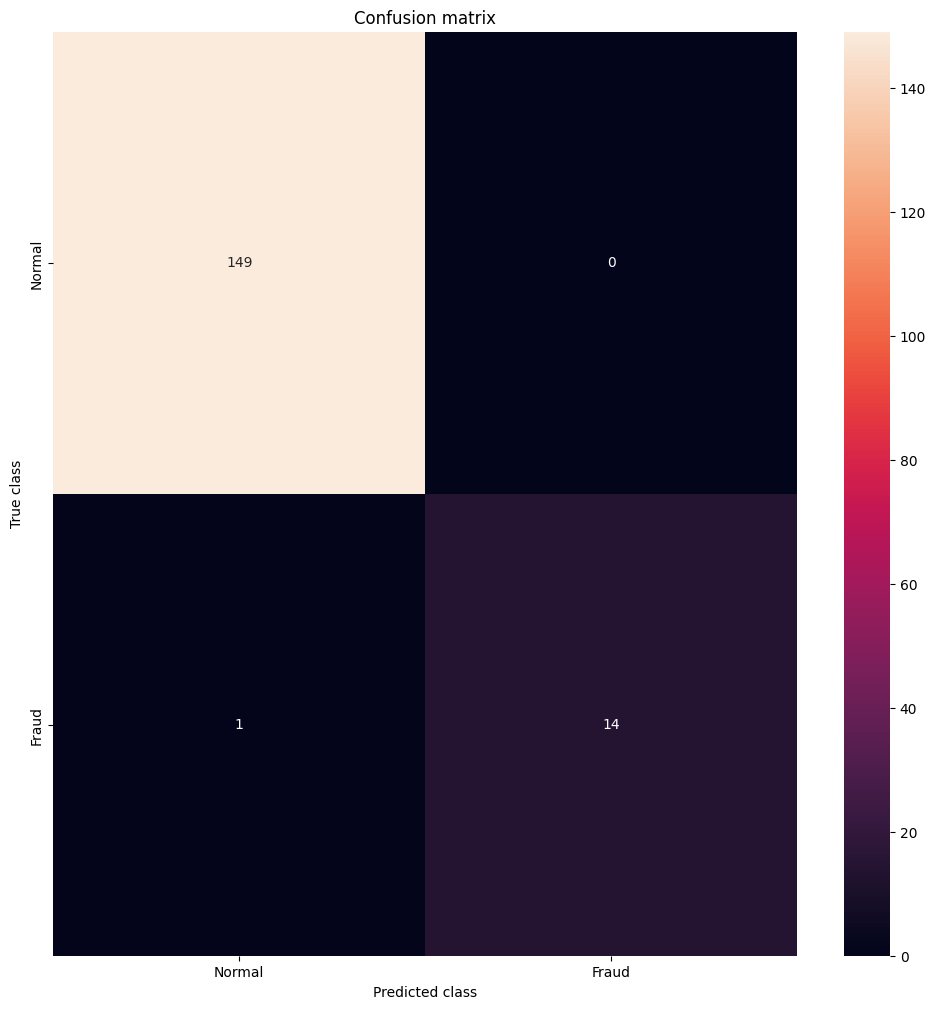

(RandomForestClassifier(class_weight='balanced', min_samples_split=10,
                        n_estimators=50, random_state=0),
 {'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 10,
  'n_estimators': 50},
 0.9939024390243902)

In [45]:
train_random_forest(df_train,'Class')

In [46]:
def train_xgb_classifier(data, target):
    # split the data into X and y
    X = data.drop(target, axis=1)
    y = data[target]

    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


    # # Scaling Data
    # scaler = MinMaxScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    # Define the XGBClassifier model
    xgb_model = XGBClassifier(random_state=0)

    # Define hyperparameters for tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 1, 2]
    }

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_xgb_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparameters
    print('Best Hyperparameters:')
    print(best_params)

    # Train the model on the full training set
    best_xgb_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred_xgb = best_xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_xgb)
    precision = precision_score(y_test, y_pred_xgb)
    recall = recall_score(y_test, y_pred_xgb)

    print(f'Accuracy on Test Set: {accuracy:.2f}')
    print(f'Precision on Test Set: {precision:.2f}')
    print(f'Recall on Test Set: {recall:.2f}')

    #visulalizing the confusion matrix
    LABELS = ['Normal', 'Fraud']
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    plt.figure(figsize =(12, 12))
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()


    return best_xgb_model, best_params

Best Hyperparameters:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Accuracy on Test Set: 0.99
Precision on Test Set: 1.00
Recall on Test Set: 0.93


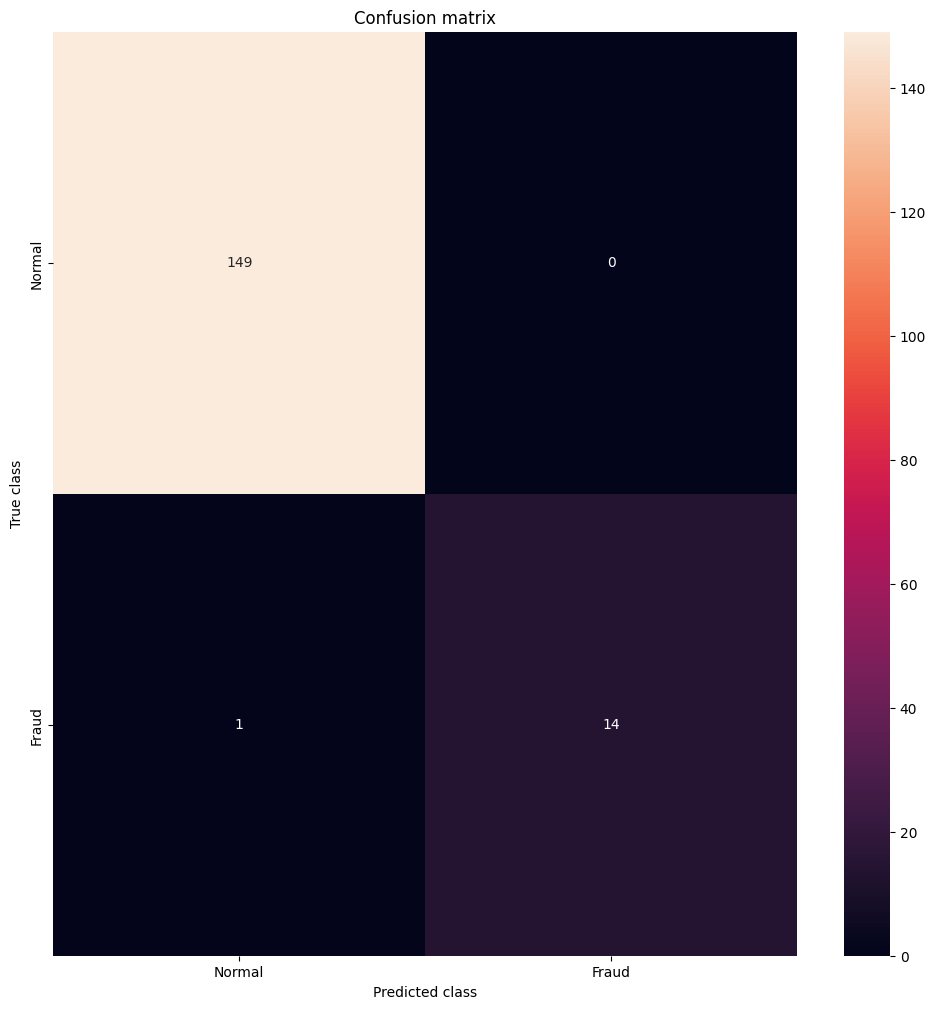

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, random_state=0, ...),
 {'colsample_bytree': 0.8,
  'gamma': 0,
  'learning_rate': 0.1,
  'max_depth': 3,
  'n_estimators': 100,
  'subsample': 1.0})

In [47]:
train_xgb_classifier(df_train,'Class')

In [48]:
# Selcting Best and Highest Accuracy from Above trained Models
# XGb Model Classifier
# Random Forest
models = ['XGB Classifier', 'RandomForestClassifier']
accuracy_scores = [accuracy, accuracy]

# Find the index of the maximum accuracy
best_accuracy_index = accuracy_scores.index(max(accuracy_scores))

# Print the best model for accuracy
print(f'Best Accuracy: {accuracy_scores[best_accuracy_index]:.2f} with Model: {models[best_accuracy_index]}')

Best Accuracy: 0.97 with Model: XGB Classifier


---

---